In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga y limpieza de datos

## (Hecho con la info obtenida en el notebook LimpiezaDeDatos)

In [2]:
#import io
#ruta = io.StringIO(uploaded['train.csv'].decode('utf-8'))
ejemplo =  pd.read_csv('data/ejemploRespuesta.csv', names = ["id", "precio"] )
test =  pd.read_csv('data/test.csv', parse_dates = ['fecha'])
train = pd.read_csv('data/train.csv',parse_dates = ['fecha'])

In [3]:
#A los nulls los relleno con el promedio de metroscubiertos de todas las publicaciones
train['metroscubiertos']=train['metroscubiertos'].fillna(round(train['metroscubiertos'].mean()))
test['metroscubiertos']=test['metroscubiertos'].fillna(round(test['metroscubiertos'].mean()))
#Luego convierto metroscubiertos a  np.int16
train['metroscubiertos']=train['metroscubiertos'].astype(np.int16)
test['metroscubiertos']=test['metroscubiertos'].astype(np.int16)

In [4]:
#A los nulls los relleno con el promedio de metrostotales de todas las publicaciones
train['metrostotales']=train['metrostotales'].fillna(round(train['metrostotales'].mean()))
test['metrostotales']=test['metrostotales'].fillna(round(test['metrostotales'].mean()))
#Luego convierto metrostotales a  np.int16
train['metrostotales']=train['metrostotales'].astype(np.int16)
test['metrostotales']=test['metrostotales'].astype(np.int16)

In [5]:
#El precio promedio de las publicaciones que no tienen datos de cant de habitaciones esta entre el precio
#promedio de las que tienen 2 y 3 habitaciones
#Entonces voy a asumir que tienen 3 habitaciones, ya que es el valor al cual el precio mas se les asemeja.
train['habitaciones']=train['habitaciones'].fillna(3)
test['habitaciones']=test['habitaciones'].fillna(3)
#Luego convierto a np.int8
train['habitaciones']=train['habitaciones'].astype(np.int8)
test['habitaciones']=test['habitaciones'].astype(np.int8)

In [6]:
#A los que no tienen datos de antiguedad los relleno con la antiguedad promedio (es 8)
train['antiguedad']=train['antiguedad'].fillna(round(train['antiguedad'].mean()))
test['antiguedad']=test['antiguedad'].fillna(round(train['antiguedad'].mean()))
#Luego convierto a np.uint8
train['antiguedad']=train['antiguedad'].astype(np.uint8)
test['antiguedad']=test['antiguedad'].astype(np.uint8)

In [7]:
#El precio promedio de los que tienen NULL en garage es parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['garages']=train['garages'].fillna(2)
test['garages']=test['garages'].fillna(2)
#convierto a np.int8
train['garages']=train['garages'].astype(np.int8)
test['garages']=test['garages'].astype(np.int8)

In [8]:
#El precio promedio de los que tienen NULL en banos es mas parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['banos']=train['banos'].fillna(2)
test['banos']=test['banos'].fillna(2)
#convierto a np.int8
train['banos']=train['banos'].astype(np.int8)
test['banos']=test['banos'].astype(np.int8)

In [9]:
train['gimnasio']=train['gimnasio'].astype(np.int8)
train['usosmultiples']=train['usosmultiples'].astype(np.int8)
train['piscina']=train['piscina'].astype(np.int8)
train['escuelascercanas']=train['escuelascercanas'].astype(np.int8)
train['centroscomercialescercanos']=train['centroscomercialescercanos'].astype(np.int8)
test['gimnasio']=test['gimnasio'].astype(np.int8)
test['usosmultiples']=test['usosmultiples'].astype(np.int8)
test['piscina']=test['piscina'].astype(np.int8)
test['escuelascercanas']=test['escuelascercanas'].astype(np.int8)
test['centroscomercialescercanos']=test['centroscomercialescercanos'].astype(np.int8)

In [10]:
#Creo categoria para los que no tienen categoria en provincia:
train['provincia']=train['provincia'].fillna('N/A')
test['provincia']=test['provincia'].fillna('N/A')
#Creo categoria para los que no tienen categoria en ciudad:
train['ciudad']=train['ciudad'].fillna('N/A')
test['ciudad']=test['ciudad'].fillna('N/A')
#Relleno los nulls en direccion con un - .
train['direccion']=train['direccion'].fillna('-')
test['direccion']=test['direccion'].fillna('-')
#Creo categoria para los que no tienen categoria en tipodepropiedad:
train['tipodepropiedad']=train['tipodepropiedad'].fillna('N/A')
test['tipodepropiedad']=test['tipodepropiedad'].fillna('N/A')

In [11]:
train['titulo']=train['titulo'].fillna(' ')
train['descripcion']=train['descripcion'].fillna(' ')
test['titulo']=test['titulo'].fillna(' ')
test['descripcion']=test['descripcion'].fillna(' ')

In [12]:
train['precio']=train['precio'].astype(np.int32)
train['id']=train['id'].astype(np.int32)
test['id']=test['id'].astype(np.int32)

In [13]:
#Algunas columnas tienen nulls que no se como encararlos. Por ahora los relleno con 0
train=train.fillna(0)
test=test.fillna(0)

# Armado de features:

In [14]:
train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [15]:
test.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos'],
      dtype='object')

## dummies para tipodepropiedad

In [16]:
#Voy a usar OneHotEncoder para convertir la columna categorica tipodepropiedad en dummies.
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
dummies = enc.fit_transform(train['tipodepropiedad'].values.reshape(-1, 1)).toarray()
dummies = pd.DataFrame(dummies)
dummies_test = enc.transform(test['tipodepropiedad'].values.reshape(-1, 1)).toarray()
dummies_test = pd.DataFrame(dummies_test)

In [17]:
dummies=dummies.add_prefix('tipodepropiedad_')
dummies=dummies.astype(np.int8)
dummies_test=dummies_test.add_prefix('tipodepropiedad_')
dummies_test=dummies_test.astype(np.int8)

In [18]:
dummies.head()

,tipodepropiedad_0,tipodepropiedad_1,tipodepropiedad_2,tipodepropiedad_3,tipodepropiedad_4,tipodepropiedad_5,tipodepropiedad_6,tipodepropiedad_7,tipodepropiedad_8,tipodepropiedad_9,...,tipodepropiedad_15,tipodepropiedad_16,tipodepropiedad_17,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22,tipodepropiedad_23,tipodepropiedad_24
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
dummies_test.head()

,tipodepropiedad_0,tipodepropiedad_1,tipodepropiedad_2,tipodepropiedad_3,tipodepropiedad_4,tipodepropiedad_5,tipodepropiedad_6,tipodepropiedad_7,tipodepropiedad_8,tipodepropiedad_9,...,tipodepropiedad_15,tipodepropiedad_16,tipodepropiedad_17,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22,tipodepropiedad_23,tipodepropiedad_24
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Features sobre el tiempo

En el TP1 vimos como los precios iban en aumento a medida que el tiempo aumentaba, por lo que nos interesa crear nuevos features tomando en cuenta el tiempo en el que se publicaron las propiedades.


Para realizar un nuevo feature comenzaremos añadiendo un peso para cada fecha, este peso irá en aumento a medida que las fechas van subiendo, así simularemos el crecimiento del precio a lo largo del tiempo.

In [20]:
#Califico las fechas de acuerdo a la diferencia entre la fecha actual y la fecha mínima sobre el máximo de dias
fecha_min = train.fecha.min()
fecha_max = train.fecha.max()
delta_max_days = (fecha_max - fecha_min).days
def calificar_fecha(fecha):
    delta = fecha - fecha_min
    return delta.days/delta_max_days

In [21]:
train["puntaje_por_fecha"] = train['fecha'].transform(lambda x: calificar_fecha(x))
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,puntaje_por_fecha
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,8,2,1,...,0.000000,0.000000,2015-08-23,0,0,0,0,0,2273000,0.728368
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10,3,2,...,19.310205,-99.227655,2013-06-28,0,0,0,1,1,3600000,0.297919
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5,3,2,...,0.000000,0.000000,2015-10-17,0,0,0,0,0,1200000,0.758488
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1,2,1,...,19.301890,-99.688015,2012-03-09,0,0,0,1,1,650000,0.037240
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10,2,1,...,0.000000,0.000000,2016-06-07,0,0,0,0,0,1150000,0.886637


In [22]:
#Set de test
fecha_min = test.fecha.min()
fecha_max = test.fecha.max()
delta_max_days = (fecha_max - fecha_min).days
test["puntaje_por_fecha"] = test['fecha'].transform(lambda x: calificar_fecha(x))
test.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha
0,4941,"casa en venta en miguel hidalgo, distrito federal",<p>excelente casa estilo moderno.</p>,Casa,Bosque de Cedros,Miguel Hidalgo,Distrito Federal,29,3,2,...,0.0,19.408668,-99.246767,2013-07-20,0,0,0,0,0,0.309967
1,51775,departamentos en venta en montebello,<p>departamento una recamara:\n</p><p>departam...,Apartamento,-,Mérida,Yucatán,8,1,1,...,113851.0,21.032480,-89.592424,2015-10-24,0,0,0,0,0,0.762322
2,115253,departamento nuevo delegación coyoacán de 87 m...,"departamento nuevo de 87.06 m2, 1 cajón de est...",Apartamento,"Pueblo de los Reyes, Coyoacán, Mexico D.F.",Coyoacán,Distrito Federal,0,2,1,...,23620.0,19.332829,-99.152913,2015-05-30,0,0,0,0,1,0.681818
3,299321,departamento en venta en acapulco,<p> raíces dv001 precioso departamento tipo k...,Apartamento,-,Acapulco de Juárez,Guerrero,2,2,2,...,129347.0,16.860487,-99.878383,2015-04-02,0,0,0,0,0,0.650055
4,173570,bonita casa sola equipada de dos niveles en lo...,"<p>casa sola, bonita de dos rec&aacute;maras u...",Casa,CEDROS,Tultitlán,Edo. de México,10,2,1,...,57125.0,19.640482,-99.127273,2013-08-15,0,0,0,1,1,0.324206


# Nuevos features sobre la SVD

Aplico la SVD a los features que tengo hasta el momento, y veo dónde se concentra la energía de la matriz. La idea es crear nuevos features a partir de esta información.

In [23]:
from scipy.linalg import svd
from scipy.sparse.linalg import svds

In [24]:
Numericos=['antiguedad','habitaciones','garages','banos','metroscubiertos',\
            'metrostotales','gimnasio','usosmultiples','piscina','escuelascercanas',\
            'centroscomercialescercanos','puntaje_por_fecha']

In [25]:
# Utilizo el set de datos con todos los features creados hasta el momento
data_features = train[Numericos].join(dummies)
#Centro los datos
centered = data_features - data_features.mean()
centered.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,tipodepropiedad_15,tipodepropiedad_16,tipodepropiedad_17,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22,tipodepropiedad_23,tipodepropiedad_24
0,-0.095042,-0.911471,-0.618175,-0.11795,-94.015558,-96.815508,-0.062475,-0.055092,-0.087383,-0.444142,...,-0.000192,-0.000317,-0.007254,-0.000558,-0.001646,-0.000708,-0.041438,-0.005525,-0.000129,-0.001417
1,1.904958,0.088529,0.381825,-0.11795,93.984442,3.184492,-0.062475,-0.055092,-0.087383,0.555858,...,-0.000192,-0.000317,-0.007254,-0.000558,-0.001646,-0.000708,-0.041438,-0.005525,-0.000129,-0.001417
2,-3.095042,0.088529,0.381825,-0.11795,-30.015558,-10.815508,-0.062475,-0.055092,-0.087383,-0.444142,...,-0.000192,-0.000317,-0.007254,-0.000558,-0.001646,-0.000708,-0.041438,-0.005525,-0.000129,-0.001417
3,-7.095042,-0.911471,-0.618175,-1.11795,-111.015558,-109.815508,-0.062475,-0.055092,-0.087383,0.555858,...,-0.000192,-0.000317,-0.007254,-0.000558,-0.001646,-0.000708,-0.041438,-0.005525,-0.000129,-0.001417
4,1.904958,-0.911471,-0.618175,-1.11795,-79.015558,-81.815508,-0.062475,-0.055092,-0.087383,-0.444142,...,-0.000192,-0.000317,-0.007254,-0.000558,-0.001646,-0.000708,-0.041438,-0.005525,-0.000129,-0.001417


In [26]:
centered.shape

(240000, 37)

In [27]:
#hago lo mismo para el set de test
# Utilizo el set de datos con todos los features creados hasta el momento
data_features_test = test[Numericos].join(dummies_test)
#Centro los datos
centered_test = data_features_test - data_features_test.mean()
centered_test.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,tipodepropiedad_15,tipodepropiedad_16,tipodepropiedad_17,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22,tipodepropiedad_23,tipodepropiedad_24
0,20.87465,0.084017,0.3821,1.885667,126.233567,-0.315817,-0.06365,-0.055533,-0.088267,-0.445967,...,-0.000117,-0.000383,-0.006917,-0.000633,-0.001667,-0.0006,-0.04075,-0.005567,-0.0001,-0.001633
1,-0.12535,-1.915983,-0.6179,-1.114333,-106.766433,-109.315817,-0.06365,-0.055533,-0.088267,-0.445967,...,-0.000117,-0.000383,-0.006917,-0.000633,-0.001667,-0.0006,-0.04075,-0.005567,-0.0001,-0.001633
2,-8.12535,-0.915983,-0.6179,-0.114333,-86.766433,-76.315817,-0.06365,-0.055533,-0.088267,-0.445967,...,-0.000117,-0.000383,-0.006917,-0.000633,-0.001667,-0.0006,-0.04075,-0.005567,-0.0001,-0.001633
3,-6.12535,-0.915983,0.3821,-0.114333,-87.766433,-90.315817,-0.06365,-0.055533,-0.088267,-0.445967,...,-0.000117,-0.000383,-0.006917,-0.000633,-0.001667,-0.0006,-0.04075,-0.005567,-0.0001,-0.001633
4,1.87465,-0.915983,-0.6179,-1.114333,-93.766433,-100.315817,-0.06365,-0.055533,-0.088267,0.554033,...,-0.000117,-0.000383,-0.006917,-0.000633,-0.001667,-0.0006,-0.04075,-0.005567,-0.0001,-0.001633


In [28]:
centered_test.shape

(60000, 37)

**Calculo la SVD**

In [29]:
u, s, vt = svd(centered, full_matrices = False)

u_test, s_test, vt_test = svd(centered_test, full_matrices = False)

In [30]:
s

array([5.46569598e+04, 2.89552515e+04, 4.22531073e+03, 4.10056414e+02,
       3.63700617e+02, 3.23490812e+02, 3.05610391e+02, 2.58456463e+02,
       1.65318475e+02, 1.47770696e+02, 1.38736135e+02, 1.12970643e+02,
       1.03778771e+02, 9.95388383e+01, 8.50214797e+01, 6.52031499e+01,
       4.80723633e+01, 3.99577261e+01, 3.73511849e+01, 3.66231406e+01,
       2.78253391e+01, 2.15112701e+01, 1.92214273e+01, 1.84433352e+01,
       1.49031580e+01, 1.35298582e+01, 1.29216719e+01, 1.21139567e+01,
       1.16685985e+01, 8.91093120e+00, 6.94098929e+00, 5.68692506e+00,
       4.56084144e+00, 2.28512064e+00, 1.04170181e+00, 9.99958352e-01,
       5.33103117e-12])

**Grafico los autovalores para detectar codos**

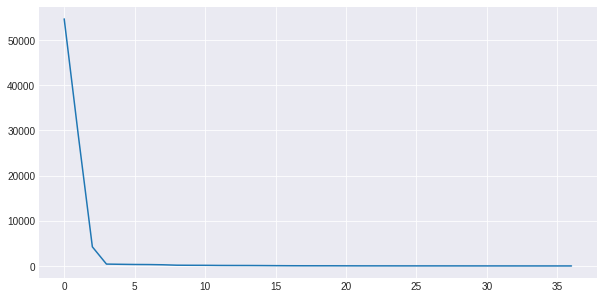

In [31]:
#Set train
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10,5))
plt.plot(s)

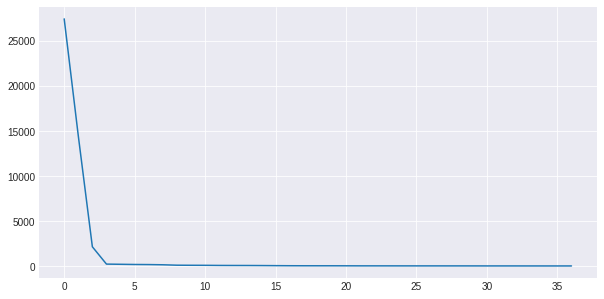

In [32]:
#Set test
plt.figure(figsize = (10,5))
plt.plot(s_test)

Claramente vemos como con 3 dimensiones podemos concentrar casi la totalidad de los datos. 

**Veamos esto en niveles de energía**

In [33]:
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[7.77087873e+01 2.18089055e+01 4.64404581e-01 4.37387542e-03
 3.44086208e-03 2.72209382e-03 2.42949171e-03 1.73761671e-03
 7.10922023e-04 5.68009796e-04 5.00677843e-04 3.31978831e-04
 2.80153621e-04 2.57729615e-04 1.88034053e-04 1.10590123e-04
 6.01132400e-05 4.15317968e-05 3.62900826e-05 3.48891476e-05
 2.01400303e-05 1.20368069e-05 9.61059903e-06 8.84826477e-06
 5.77744473e-06 4.76174001e-06 4.34326783e-06 3.81725542e-06
 3.54173924e-06 2.06550081e-06 1.25320448e-06 8.41267672e-07
 5.41089539e-07 1.35830549e-07 2.82270848e-08 2.60101594e-08
 7.39267533e-31]


In [34]:
energy_total

3844331325.138241

## Ahora veo la energia acumulada 


**Set de train**

In [35]:
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 54656.959767277214 77.71%
Number of Singular Values 2: 28955.251458536863 99.52%
Number of Singular Values 3: 4225.310730102515 99.98%
Number of Singular Values 4: 410.0564144114013 99.99%
Number of Singular Values 5: 363.7006169054934 99.99%
Number of Singular Values 6: 323.4908117624322 99.99%
Number of Singular Values 7: 305.610390653573 100.0%
Number of Singular Values 8: 258.4564633152854 100.0%
Number of Singular Values 9: 165.31847453142916 100.0%
Number of Singular Values 10: 147.77069572285538 100.0%
Number of Singular Values 11: 138.7361350168447 100.0%
Number of Singular Values 12: 112.97064302872892 100.0%
Number of Singular Values 13: 103.7787714953297 100.0%
Number of Singular Values 14: 99.53883833097034 100.0%
Number of Singular Values 15: 85.0214796600194 100.0%
Number of Singular Values 16: 65.20314992247124 100.0%
Number of Singular Values 17: 48.07236334616957 100.0%
Number of Singular Values 18: 39.95772609444795 100.0%
Number of Singul

Veo que con 3 dimensiones tengo el 99.98% de la energía acumulada, y con 7 llego a un 100%.

Puedo tomar las primeras 3 columnas de U y multiplicarlas por las 3 primeras filas y columnas de S, para escalar los datos, y agregar esas columnas como features

In [36]:
#set de train, tomo una representación de los datos en 3 dimensiones
aprox3 = np.matrix(u[:, :3]) * np.diag(s[:3]) 
features_svd = pd.DataFrame(aprox3)
features_svd.columns = ['svd1', 'svd2', 'svd3']
features_svd.head()

,svd1,svd2,svd3
0,-133.929109,-16.609562,-0.467310
1,75.276277,-56.375842,-1.301171
2,-30.186886,10.374756,2.906499
3,-155.359749,-16.070033,6.418748
4,-112.836910,-14.313549,-2.386127


In [37]:
features_totales = data_features.join(features_svd)
features_totales.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22,tipodepropiedad_23,tipodepropiedad_24,svd1,svd2,svd3
0,8,2,1,2,80,80,0,0,0,0,...,0,0,0,0,0,0,0,-133.929109,-16.609562,-0.467310
1,10,3,2,2,268,180,0,0,0,1,...,0,0,0,0,0,0,0,75.276277,-56.375842,-1.301171
2,5,3,2,2,144,166,0,0,0,0,...,0,0,0,0,0,0,0,-30.186886,10.374756,2.906499
3,1,2,1,1,63,67,0,0,0,1,...,0,0,0,0,0,0,0,-155.359749,-16.070033,6.418748
4,10,2,1,1,95,95,0,0,0,0,...,0,0,0,0,0,0,0,-112.836910,-14.313549,-2.386127


Hago lo mismo para el set de test

In [38]:
#set de train, tomo una representación de los datos en 3 dimensiones
aprox3_test = np.matrix(u_test[:, :3]) * np.diag(s_test[:3]) 
features_svd_test= pd.DataFrame(aprox3_test)
features_svd_test.columns = ['svd1', 'svd2', 'svd3']
features_svd_test.head()

,svd1,svd2,svd3
0,98.364331,79.360933,-19.961510
1,-151.698284,18.429729,-0.526856
2,-115.478720,5.172526,7.581983
3,-125.008204,15.477008,5.595334
4,-135.911886,19.560979,-2.451757


In [39]:
features_totales_test = data_features_test.join(features_svd_test)
features_totales_test.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22,tipodepropiedad_23,tipodepropiedad_24,svd1,svd2,svd3
0,29,3,2,4,300,176,0,0,0,0,...,0,0,0,0,0,0,0,98.364331,79.360933,-19.961510
1,8,1,1,1,67,67,0,0,0,0,...,0,0,0,0,0,0,0,-151.698284,18.429729,-0.526856
2,0,2,1,2,87,100,0,0,0,0,...,0,0,0,0,0,0,0,-115.478720,5.172526,7.581983
3,2,2,2,2,86,86,0,0,0,0,...,0,0,0,0,0,0,0,-125.008204,15.477008,5.595334
4,10,2,1,1,80,76,0,0,0,1,...,0,0,0,0,0,0,0,-135.911886,19.560979,-2.451757


In [40]:
features_totales_test.shape

(60000, 40)

**Pruebo el modelo con este nuevo feature**

In [41]:
X=features_totales
Y=train['precio']

In [42]:
X.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22,tipodepropiedad_23,tipodepropiedad_24,svd1,svd2,svd3
0,8,2,1,2,80,80,0,0,0,0,...,0,0,0,0,0,0,0,-133.929109,-16.609562,-0.467310
1,10,3,2,2,268,180,0,0,0,1,...,0,0,0,0,0,0,0,75.276277,-56.375842,-1.301171
2,5,3,2,2,144,166,0,0,0,0,...,0,0,0,0,0,0,0,-30.186886,10.374756,2.906499
3,1,2,1,1,63,67,0,0,0,1,...,0,0,0,0,0,0,0,-155.359749,-16.070033,6.418748
4,10,2,1,1,95,95,0,0,0,0,...,0,0,0,0,0,0,0,-112.836910,-14.313549,-2.386127


In [43]:
Y.head()

0    2273000
1    3600000
2    1200000
3     650000
4    1150000
Name: precio, dtype: int32

In [44]:
X_test = features_totales_test
X_test.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22,tipodepropiedad_23,tipodepropiedad_24,svd1,svd2,svd3
0,29,3,2,4,300,176,0,0,0,0,...,0,0,0,0,0,0,0,98.364331,79.360933,-19.961510
1,8,1,1,1,67,67,0,0,0,0,...,0,0,0,0,0,0,0,-151.698284,18.429729,-0.526856
2,0,2,1,2,87,100,0,0,0,0,...,0,0,0,0,0,0,0,-115.478720,5.172526,7.581983
3,2,2,2,2,86,86,0,0,0,0,...,0,0,0,0,0,0,0,-125.008204,15.477008,5.595334
4,10,2,1,1,80,76,0,0,0,1,...,0,0,0,0,0,0,0,-135.911886,19.560979,-2.451757


In [45]:
X_test.shape

(60000, 40)

# Armado de modelos

In [46]:
def crear_submit(model, x_train, y_train, x_test, nombre):
    model.fit(x_train, y_train)
    result = model.predict(x_test)
    final = test.loc[:, ['id']]
    final['target'] = result
    ruta = "data/submit"+ nombre +".csv"
    final.to_csv(path_or_buf = ruta, index = False )
    df = pd.read_csv(ruta)
    return df

In [47]:
from sklearn import preprocessing 
def normalizar_data(df):
    min_max_scaler = preprocessing.MinMaxScaler() 
    np_scaled = min_max_scaler.fit_transform(df)
    return pd.DataFrame(np_scaled)

In [48]:
from sklearn.model_selection import cross_val_score

# BaseLine para nuestros modelos

## (1) KNN

In [49]:
from sklearn.neighbors import KNeighborsRegressor

In [50]:
#Por default toma n = 5
KNN_model = KNeighborsRegressor()

In [51]:
KNN_model.fit(X,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

**Mido el resultado de knn utilizando la métrica MAE**

In [52]:
# Con cross validation y n=5
scores = cross_val_score(KNN_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
KNN_mae_score1 = -scores.mean()
KNN_mae_score1

983894.3305625

In [53]:
# Otra Alternativa
from sklearn import metrics 
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = None)   

KNN_model.fit(X_train, Y_train) 
  
Y_pred = KNN_model.predict(X_test) 
  
KNN_mae_score2 = metrics.mean_absolute_error(Y_test, Y_pred) 
KNN_mae_score2


997581.4605291667

## (2) Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression().fit(X, Y)
scores = cross_val_score(LR_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
LR_score1 = -scores.mean()

In [55]:
LR_score1

11327027208.280144

**Evidentemente es mucho peor que KNN**

## (3) Árbol de Decisión

In [56]:
from sklearn.tree import DecisionTreeRegressor

DTR_model = DecisionTreeRegressor().fit(X, Y)
scores = cross_val_score(DTR_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
DTR_score1 = -scores.mean()
DTR_score1

1109121.100978631

# Probamos más modelos

## (1) Random Forest

In [57]:
from sklearn.ensemble  import RandomForestRegressor

RF_model=RandomForestRegressor()

RF_model.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### MAE score para RF

**Datos con features de la SVD**

In [58]:
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score1 = -scores.mean()
RF_mae_score1

864572.7803254311

**Datos sin features de la SVD**

In [59]:
X = data_features ##Set de features sin agregar features sobre la svd
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score2 = -scores.mean()
RF_mae_score2

865423.1508974757

Evidentemente los features de ls SVD, aplicados de esta manera no aportan buenos resultados, por lo que no serán tomados en cuenta. Luego veremos si utilizandolos de otra manera funcionan mejor.

In [63]:
RF_model.fit(X,Y)
importancias = pd.DataFrame(RF_model.feature_importances_,index=X.columns,columns=['importancia']).reset_index()
importancias.columns = ['feature', 'importancia']

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text yticklabel objects>)

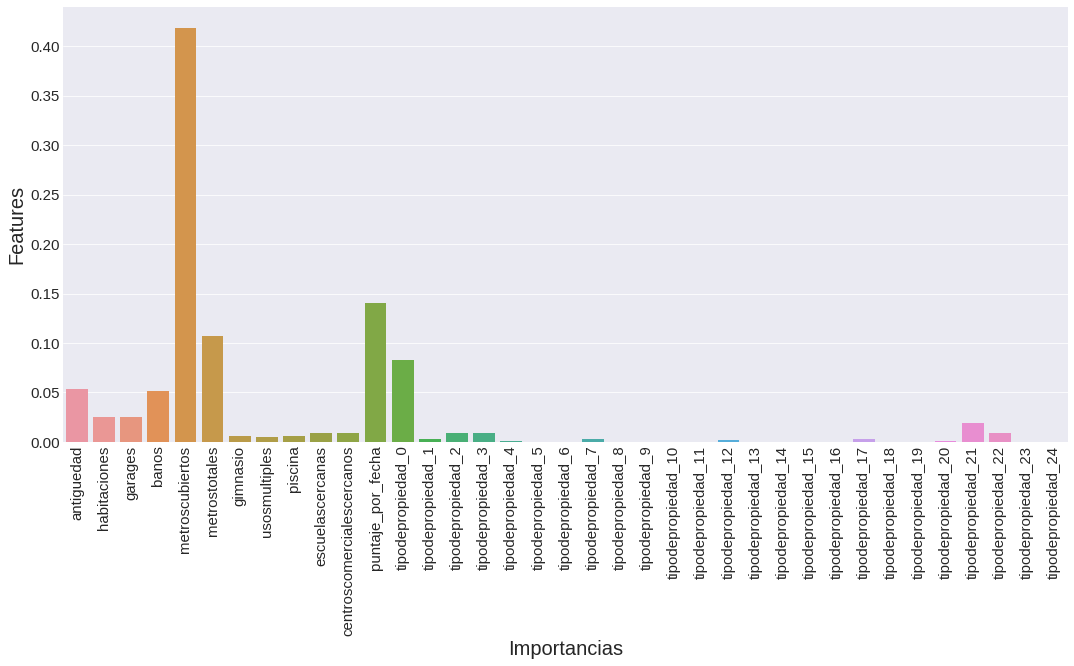

In [64]:
import seaborn as sns
plt.figure(figsize = (18,8))
graf = sns.barplot(x = importancias.feature, y = importancias.importancia, orient = 'v')
graf.set_xlabel("Importancias", fontsize = 20)
graf.set_ylabel("Features", fontsize = 20)
plt.xticks(fontsize = 15, rotation = 'vertical')
plt.yticks(fontsize = 15)

## (2) Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

GBR_model = GradientBoostingRegressor(random_state=23, n_estimators=50, min_samples_split=50).fit(X, Y)
scores = cross_val_score(GBR_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
GBR_mae_score1 = -scores.mean()
GBR_mae_score1

933692.0618025201

# Creación del archivo Submit

## Hago un submit con los datos normalizados sin los features de la svd

In [66]:
X_normalized = normalizar_data(data_features)
X_test_normalized = normalizar_data(data_features_test)

In [67]:
X_test_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.3625,0.222222,0.666667,1.000000,0.672170,0.379717,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1000,0.000000,0.333333,0.000000,0.122642,0.122642,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0000,0.111111,0.333333,0.333333,0.169811,0.200472,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0250,0.111111,0.666667,0.333333,0.167453,0.167453,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1250,0.111111,0.333333,0.000000,0.153302,0.143868,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Pruebo el modelo con los datos normalizados**

In [68]:
#Utilizo el modelo que funciona mejor, Random Forest
scores = cross_val_score(RF_model , X_normalized, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score2 = -scores.mean()
RF_mae_score2

863858.5959769146

In [69]:
#Pruebo con gradient boosting
GBR_model.fit(X, Y)
scores = cross_val_score(GBR_model , X_normalized, Y, scoring="neg_mean_absolute_error", cv=10)
GBR_mae_score2 = -scores.mean()
GBR_mae_score2

933692.0618025201

In [ ]:
submit1 = crear_submit(RF_model,X_normalized, Y, X_test_normalized, "RF_sin_svd_normalized")
submit1.head()